## CDC Dataset Exploration
Data Source: https://www.cdc.gov/nchs/nhis/nhis_2018_data_release.htm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### Family Data Analysis
Variable Descriptions: https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NHIS/2018/familyxx_summary.pdf

In [2]:
family = pd.read_csv('Data/familyxx.csv')
family

,FINT_Y_P,FINT_M_P,FMX,RECTYPE,SRVY_YR,HHX,FM_SIZE,FM_STRCP,FM_TYPE,FM_STRP,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
0,2018,1,1,60,2018,1,1,11,1,11,...,NaN,1,2,2,NaN,2,1,1,NaN,NaN
1,2018,1,1,60,2018,4,3,41,4,41,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
2,2018,2,1,60,2018,6,4,41,4,41,...,1.0,2,2,2,NaN,1,4,1,2.0,4.0
3,2018,3,1,60,2018,8,3,41,4,41,...,3.0,3,2,1,NaN,2,3,1,2.0,3.0
4,2018,2,1,60,2018,9,1,11,1,11,...,NaN,2,1,1,1.0,2,1,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304,2018,11,3,60,2018,55556,1,12,1,12,...,1.0,1,2,2,NaN,2,1,1,NaN,1.0
30305,2018,11,1,60,2018,55557,1,11,1,11,...,NaN,2,1,2,1.0,2,0,2,NaN,NaN
30306,2018,12,1,60,2018,55560,1,11,1,11,...,4.0,5,1,1,2.0,2,1,1,2.0,1.0
30307,2018,10,1,60,2018,55562,2,21,2,21,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0


In [3]:
# 'FHICOVCT' is number of people in a family who are insured
family['FHICOVCT'].describe()

count    30309.000000
mean         2.167871
std          1.420637
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: FHICOVCT, dtype: float64

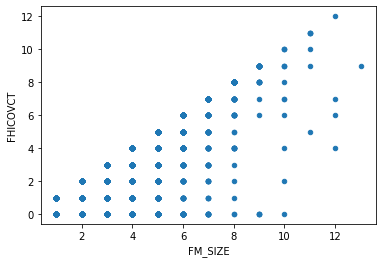

In [4]:
# comparing family size and number of people who are insured
family.plot(kind='scatter',x='FM_SIZE',y='FHICOVCT')
plt.show()

In [5]:
family['percent_insured'] = family['FHICOVCT'] / family['FM_SIZE']
family['percent_insured'].describe()
# most people in a family seem to be insured (90.8%)

count    30309.000000
mean         0.908244
std          0.251362
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: percent_insured, dtype: float64

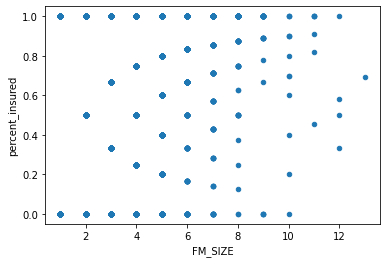

In [6]:
# a scatter plot comparing family size and number of people who are insured
family.plot(kind='scatter',x='FM_SIZE',y='percent_insured')
plt.show()

In [7]:
family_4 = family[family['FM_SIZE']==4]

<AxesSubplot:>

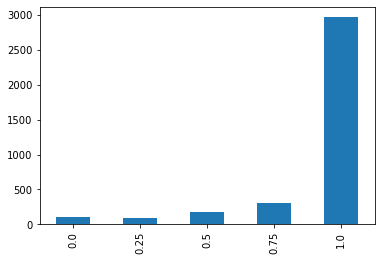

In [9]:
# family of 4 percent insured
X = family_4['FM_SIZE']
y = family_4['percent_insured']
y.value_counts().sort_index().plot.bar()

Conclusion: Most families are insured with some sort of health care plan

### Child Data Analysis
Variable Descriptions: https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NHIS/2018/familyxx_summary.pdf

In [10]:
child = pd.read_csv('Data/samchild.csv')
child

,FPX,INTV_QRT,SEX,FMX,HISPAN_I,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,RECTYPE,...,CAROUTP,CSRESPNO,LATEINTC,CSRELTVP,RSCL2_C2,RSCL2_E2,RSCL3_E3,RSCL5_P5,RSCL5_H5,RSCL6
0,3,1,1,1,12,1,1,1,16,40,...,NaN,1,2,1,2.0,1.0,0.0,0.0,1.0,0.0
1,3,1,1,1,12,1,1,1,9,40,...,NaN,1,2,1,2.0,0.0,0.0,0.0,2.0,0.0
2,3,1,1,1,12,1,1,1,3,40,...,NaN,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,1,12,1,1,1,0,40,...,NaN,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,1,1,12,2,2,2,10,40,...,2.0,1,1,1,2.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,4,4,2,1,12,1,1,1,4,40,...,NaN,1,2,1,1.0,0.0,1.0,0.0,2.0,0.0
8265,3,4,1,1,12,2,2,2,2,40,...,NaN,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN
8266,4,4,1,1,12,1,1,1,11,40,...,2.0,1,2,1,2.0,0.0,0.0,0.0,2.0,0.0
8267,4,4,2,1,12,1,1,1,14,40,...,NaN,1,2,1,2.0,0.0,0.0,2.0,1.0,0.0


In [11]:
# 7, 8, 9 are refused, not ascertained, and don't know so were removed
# most people had last seen/talked to a healthcare professional within the previous year/ 6 months

child[child['CMDLONGR'] < 7]['CMDLONGR'].describe()

count    8197.000000
mean        1.243016
std         0.601153
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: CMDLONGR, dtype: float64

In [12]:
# 7, 8, 9 are refused, not ascertained, and don't know so were removed
# most people had last visited the doctor's office within the last 4-5 months (mean is 2-3 months)

child[child['CHCNOYR2'] < 7]['CHCNOYR2'].describe()

count    7896.000000
mean        2.103470
std         1.311443
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: CHCNOYR2, dtype: float64

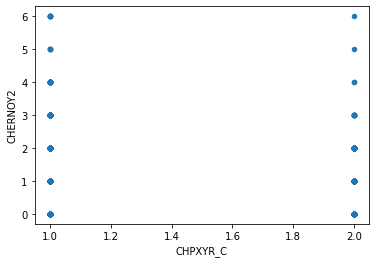

In [13]:
#child2 = child.replace([7, 8, 9], 0)
child2 = child[child['CHERNOY2'] < 7]
child2 = child2[child2['CHPXYR_C'] < 7]
child2.plot(kind='scatter',x='CHPXYR_C',y='CHERNOY2')
plt.show()

In [14]:
# 1 = yes, had well child checkup
child2[child2['CHPXYR_C'] == 1]['CHERNOY2'].describe()

count    7061.000000
mean        0.302507
std         0.687180
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: CHERNOY2, dtype: float64

In [15]:
child2[child2['CHPXYR_C'] == 1]['CHERNOY2'].value_counts()

0    5614
1     913
2     431
3      70
4      21
6       7
5       5
Name: CHERNOY2, dtype: int64

In [16]:
# 2 = no, did not have well child checkup, similar stats for 
child2[child2['CHPXYR_C'] == 2]['CHERNOY2'].describe()

count    1135.000000
mean        0.244934
std         0.634063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: CHERNOY2, dtype: float64

In [17]:
child2[child2['CHPXYR_C'] == 2]['CHERNOY2'].value_counts()

0    949
1    114
2     59
3      9
4      2
6      1
5      1
Name: CHERNOY2, dtype: int64

For those who had a well-child checkup 5614/7061(79.5%) did not go to the emergency room in the past 12 months.  
For those who did not have a well-child checkup 949/1135(83.6%) did not go to the emergency room in the past 12 months.

In [18]:
# compare adult insured rates vs child insured rates

In [19]:
person = pd.read_csv('Data/personsx.csv')
person

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,...,EDUC1,ERNYR_P,ARMFTM7P,ARMFTM1P,ARMFTM2P,ARMFTM3P,ARMFTM4P,ARMFTM5P,ARMFTM6P,ENGLANG
0,1,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1.0,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,NaN,1,2,2.0,2.0,NaN,NaN,NaN,2.0,...,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2,NaN,1,1,2.0,1.0,NaN,NaN,NaN,0.0,...,15,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,NaN,1,1,2.0,2.0,NaN,NaN,NaN,1.0,...,21,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72826,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
72827,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
72828,1,NaN,4,2,2.0,2.0,NaN,NaN,NaN,1.0,...,18,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
72829,2,NaN,4,1,NaN,1.0,NaN,NaN,NaN,2.0,...,18,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [36]:
person2 = person[person['PDMED12M'] < 7]
person2 = person2[person2['PHSTAT'] < 7]

In [34]:
person2[person2['PDMED12M'] == 1]['PHSTAT'].describe() # have delayed healthcare in the past 12 months

count    5286.000000
mean        2.737420
std         1.145559
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: PHSTAT, dtype: float64

In [35]:
person2[person2['PDMED12M'] == 2]['PHSTAT'].describe() # people who haven't delayed feel better about their health 

count    67444.000000
mean         2.077012
std          1.025945
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: PHSTAT, dtype: float64

In [ ]:
#